In [2]:
import numpy as np
import os

def array_to_str(arr):
    res_str = ""
    for i in range(arr.shape[1]):
        if arr[0, i] == 1:
            res_str = res_str + 'A'
        elif arr[1, i] == 1:
            res_str = res_str + 'T'
        elif arr[2, i] == 1:
            res_str = res_str + 'C'
        elif arr[3, i] == 1:
            res_str = res_str + 'G'
        else:
            res_str = res_str + '_'
    return res_str

In [3]:
def print_high_act_and_proto(analysis_path, num_to_print=1, weight_by_letter=None):
    for i in range(num_to_print):
        high_act_region = np.load(os.path.join(analysis_path, 'top-{}_activated_test_patch.npy'.format(i+1)))
        proto_region = np.load(os.path.join(analysis_path, 'top-{}_activated_prototype_patch.npy'.format(i+1)))
        print("Top {} activated region: \t\t".format(i+1) + array_to_str(high_act_region))
        print("Top {} activated prototype: \t\t".format(i+1) + array_to_str(proto_region))


In [4]:
def print_high_act_and_proto_global(analysis_path, num_to_print=1, prot_ind=1):
    for i in range(num_to_print):
        high_act_region = np.load(os.path.join(analysis_path, 'most_activated_patches_for_prot_'+str(prot_ind), 'top-{}_activated_test_patch.npy'.format(i+1)))
        proto_region = np.load(os.path.join(analysis_path, 'prototype_patch.npy'))
        # proto_region = np.load(os.path.join(analysis_path, 'top-{}_activated_prototype_patch.npy'.format(i+1)))
        print("Top {} activated region: \t\t ".format(i+1) + array_to_str(high_act_region))
        print("Prototype patch: \t\t\t", array_to_str(proto_region))
        # print("Top {} activated prototype: \t\t".format(i+1) + array_to_str(proto_region))

In [4]:
print_high_act_and_proto_global('./test_global/base_feature/input_concat_test/200_16push0.7519.pth/', num_to_print=10, prot_ind=100)

FileNotFoundError: [Errno 2] No such file or directory: './test_global/base_feature/input_concat_test/200_16push0.7519.pth/most_activated_patches_for_prot_100/top-1_activated_test_patch.npy'

In [4]:
print_high_act_and_proto('./test_local_seq_150/base_feature/input_concat_test_0.8/350_19push0.8534.pth/', num_to_print=10)

Top 1 activated region: 		TGAGAATGC
Top 1 activated prototype: 		CAAAGGCTT
Top 2 activated region: 		CCCTTACAG
Top 2 activated prototype: 		GGCTTGGTC
Top 3 activated region: 		TAAACTTAC
Top 3 activated prototype: 		GAAAGCCCC
Top 4 activated region: 		CCCGGAAAC
Top 4 activated prototype: 		CCTGACTTT
Top 5 activated region: 		TTTAGCTAA
Top 5 activated prototype: 		CTAGAAAGC
Top 6 activated region: 		CTTACAGTT
Top 6 activated prototype: 		GCTTGGTCC
Top 7 activated region: 		CTTACAGTT
Top 7 activated prototype: 		GCTTGGTCC
Top 8 activated region: 		CTTGGTCCT
Top 8 activated prototype: 		TTAAGACGG
Top 9 activated region: 		CAACTTTAG
Top 9 activated prototype: 		CCCTAGAAA
Top 10 activated region: 		CAACTTTAG
Top 10 activated prototype: 		CCCTAGAAA


In [5]:
print_high_act_and_proto('./test_local_seq_150/base_feature/input_concat_test_0.4/300_19push0.7932.pth/most_activated_prototypes', num_to_print=10)

Top 1 activated region: 		CCCTTACAG
Top 1 activated prototype: 		GGCTTGGTC
Top 2 activated region: 		CCCTTACAG
Top 2 activated prototype: 		GGCTTGGTC
Top 3 activated region: 		CCCTTACAG
Top 3 activated prototype: 		GGCTTGGTC
Top 4 activated region: 		CTTACAGTT
Top 4 activated prototype: 		GCTTGGTCC
Top 5 activated region: 		GAAACAAGG
Top 5 activated prototype: 		TGACTTTAT
Top 6 activated region: 		AACTTACAC
Top 6 activated prototype: 		AAAGCCCCG
Top 7 activated region: 		CAACTTTAG
Top 7 activated prototype: 		CCCTAGAAA
Top 8 activated region: 		TTATCAACT
Top 8 activated prototype: 		GGCCCTAGA
Top 9 activated region: 		TTATCAACT
Top 9 activated prototype: 		AGCCCTAGA
Top 10 activated region: 		TAACGTAGC
Top 10 activated prototype: 		CTAACGTAG


In [5]:
import cv2
from matplotlib import pyplot as plt
import numpy as np
import matplotlib
import torch
import torch.nn.functional as F

# font = {'family' : 'normal',
#         'weight' : 'bold',
#         'size'   : 22}
# matplotlib.rc('font', **font)

# #print_high_act_and_proto('./test_local_seq_150/base_feature/input_concat_test_0.8/300_15push0.8459.pth/top-1_class_prototypes', num_to_print=1)
# # act_map = np.load('./saved_models/base_feature/input_concat_test_0.5/seq/epoch-100/prototype_1_activations.npy')
# act_map = np.load('./saved_models/base_feature/input_concat_test_0.5/seq/epoch-100/prototype_1_activations.npy')
# act_map = np.repeat(act_map, repeats=2)
# for i in range(act_map.shape[-1] // 2 - 1):
#     act_map[1+(2*i)] = (act_map[(2*i)] + act_map[2*(i+1)])/2

# input_seq = np.load('./saved_models/base_feature/input_concat_test_0.5/seq/epoch-100/prototype_1_original.npy')
# print(input_seq.shape)
# input_seq = array_to_str(input_seq)

# colors = plt.get_cmap('coolwarm')(act_map)
# chars_per_line = 20
# for ind, c in enumerate(colors):
#     x = (ind % chars_per_line) / chars_per_line
#     y = 1 - ((ind // chars_per_line) / 10)
#     plt.text(x, y, input_seq[ind], color=c)
# plt.axis('off')
# plt.show()

/home/users/jcd97/torch-env/lib/python3.6/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [13]:
def visualize_local_analysis(model_path='./test_local_seq_150/base_feature/corrected_max_test_0.3/300_19push0.7632.pth/',
                                type='most_activated_prototypes',
                                img_ind=1):
    font = {'family' : 'normal',
            'weight' : 'bold',
            'size'   : 22}
    matplotlib.rc('font', **font)

    act_map = np.load('{}{}/top-{}_prototype_activation_map.npy'.format(model_path, type, img_ind))
    act_map = np.repeat(act_map, repeats=2)
    print("Max activation: {}".format(np.max(act_map)))
    #for i in range(act_map.shape[-1] // 2 - 1):
    #    act_map[1+(2*i)] = (act_map[(2*i)] + act_map[2*(i+1)])/2

    input_seq = np.load('{}original_seq.npy'.format(model_path))
    proto_patch = np.load('{}{}/top-{}_activated_prototype_patch.npy'.format(model_path, type, img_ind))
    print("Top {} activated prototype for this seq:\n".format(img_ind), array_to_str(proto_patch))
    input_seq = array_to_str(input_seq[0])

    colors = plt.get_cmap('coolwarm')(act_map)
    chars_per_line = 20
    for ind, c in enumerate(colors):
        x = (ind % chars_per_line) / chars_per_line
        y = 1 - ((ind // chars_per_line) / 10)
        plt.text(x, y, input_seq[ind], color=c)
    plt.axis('off')
    plt.show()

In [14]:
def visualize_global_analysis(model_path='./test_global/base_feature/input_concat_test/200_16push0.7519.pth/',
                                type='most_activated_patches_for_prot_',
                                img_ind=1, prot_ind=1):
    font = {'family' : 'normal',
            'weight' : 'bold',
            'size'   : 22}
    matplotlib.rc('font', **font)

    files=os.listdir('{}{}{}'.format(model_path,type, prot_ind))
    for f in files:
        if f.split('_')[0]=='top-'+str(img_ind):
            if f.split('_')[3]=='map':
                act_map_fname=f
            elif f.split('_')[3]=='seq':
                test_seq_fname=f
            

    act_map = np.load('{0}{1}{2}/{3}'.format(model_path, type, prot_ind, act_map_fname))
    act_map = np.repeat(act_map, repeats=2)
    print("Max activation: {}".format(np.max(act_map)))
    #for i in range(act_map.shape[-1] // 2 - 1):
    #    act_map[1+(2*i)] = (act_map[(2*i)] + act_map[2*(i+1)])/2

    proto_patch = np.load('{}/prototype_patch.npy'.format(model_path))
    input_test_seq = np.load('{}{}{}/{}'.format(model_path, type, prot_ind, test_seq_fname))
    test_seq_patch = np.load('{}{}{}/top-{}_activated_test_patch.npy'.format(model_path, type, prot_ind, img_ind))
    print('Prototype : ', array_to_str(proto_patch))
    print("Top {} activated patch in test seq for this prototype:\n".format(img_ind), array_to_str(test_seq_patch))
    input_test_seq = array_to_str(input_test_seq[0])

    colors = plt.get_cmap('coolwarm')(act_map)
    chars_per_line = 20
    for ind, c in enumerate(colors):
        x = (ind % chars_per_line) / chars_per_line
        y = 1 - ((ind // chars_per_line) / 10)
        plt.text(x, y, input_test_seq[ind], color=c)
    plt.axis('off')
    plt.show()

In [15]:
for i in range(10):
    visualize_global_analysis(img_ind=i+1, prot_ind=500)

FileNotFoundError: [Errno 2] No such file or directory: './test_global/base_feature/input_concat_test/200_16push0.7519.pth/most_activated_patches_for_prot_500'

In [8]:
def visualize_prototype_self_act(model_path='./saved_models/base_feature/input_concat_test_0.5/seq/epoch-100/',
                                prototype_ind=1):
    font = {'family' : 'normal',
            'weight' : 'bold',
            'size'   : 22}
    matplotlib.rc('font', **font)

    act_map = np.load('{}prototype_{}_activations.npy'.format(model_path, prototype_ind))
    act_map = np.repeat(act_map, repeats=2)
    #for i in range(act_map.shape[-1] // 2 - 1):
    #    act_map[1+(2*i)] = (act_map[(2*i)] + act_map[2*(i+1)])/2

    input_seq = np.load('{}prototype_{}_original.npy'.format(model_path, prototype_ind))
    proto_patch = np.load('{}prototype_{}_patch.npy'.format(model_path, prototype_ind))
    print("Prototype: ", array_to_str(proto_patch))
    input_seq = array_to_str(input_seq)

    colors = plt.get_cmap('coolwarm')(act_map)
    chars_per_line = 20
    for ind, c in enumerate(colors):
        x = (ind % chars_per_line) / chars_per_line
        y = 1 - ((ind // chars_per_line) / 10)
        plt.text(x, y, input_seq[ind], color=c)
    plt.axis('off')
    plt.show()

Max activation: 0.9996544718742371
Top 1 activated prototype for this seq:
 GGACTTGGCG


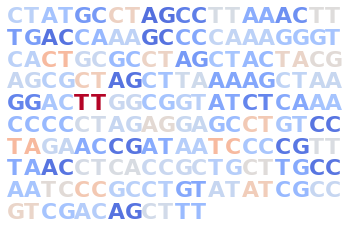

Max activation: 0.9996525049209595
Top 2 activated prototype for this seq:
 ATAATCCCCG


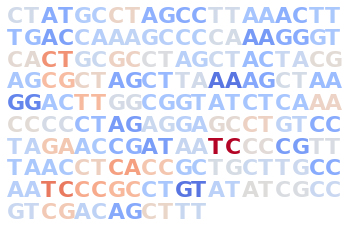

Max activation: 0.9996441006660461
Top 3 activated prototype for this seq:
 CTCACCGCTG


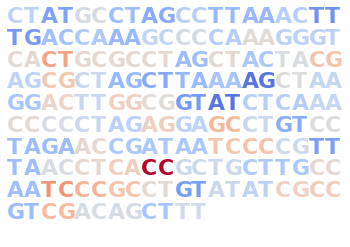

In [17]:
# Each tuple is model_dir, specific_model, epoch for model
latent_weight_to_model = {
    1: ('base_feature/ablation_latent_1/', '250_19push0.7820.pth', '250'),
    0.9: ('base_feature/ablation_latent_0.9/', '200_4push0.7632.pth', '200'),
    0.8: ('base_feature/ablation_latent_0.8/', '300_5push0.8083.pth', '300'),
    0.7: ('base_feature/ablation_latent_0.7/', '250_16push0.7970.pth', '250'),
    0.6: ('base_feature/ablation_latent_0.6/', '300_15push0.7782.pth', '300'),
    0.5: ('base_feature/ablation_latent_0.5/', '450_12push0.8008.pth', '450'),
    0.4: ('base_feature/ablation_latent_0.4/', '300_12push0.7669.pth', '300'),
    0.3: ('base_feature/ablation_latent_0.3/', '350_17push0.7519.pth', '350'),
    0.2: ('base_feature/ablation_latent_0.2/', '250_19push0.7218.pth', '250'),
    0.1: ('base_feature/ablation_latent_0.1/', '250_7push0.7068.pth', '250'),
    0: ('base_feature/ablation_latent_0/', '350_19push0.5977.pth', '350')
}

target_latent_weight = 0.5
target_seq = 100
model_dir = latent_weight_to_model[target_latent_weight][0]
target_model = latent_weight_to_model[target_latent_weight][1]
epoch_num = latent_weight_to_model[target_latent_weight][2]

#visualize_prototype_self_act(model_path='./saved_models/{}/seq/epoch-{}/'.format(model_dir, epoch_num),
#                            prototype_ind=1)
for i in range(3):
    visualize_local_analysis(model_path='./test_local_seq_{}/{}{}/'.format(target_seq, model_dir, target_model),
            img_ind=i+1)


Max activation: 0.9996626973152161
CAATAATGAA


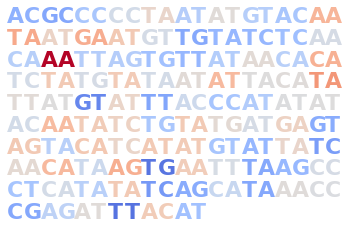

In [25]:
visualize_local_analysis(model_path='./test_local_seq_250/base_feature/corrected_max_test_0.3/300_19push0.7632.pth/',
        img_ind=2)

Max activation: 0.999646008014679
ACTACTCTAT


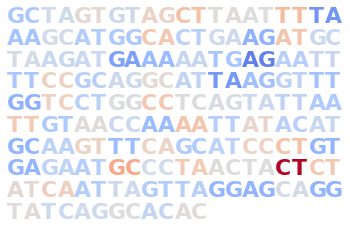

In [22]:
visualize_local_analysis(model_path='./test_local_seq_50/base_feature/corrected_max_test_0.6/350_10push0.7820.pth/',
        img_ind=1)

Max activation: 0.7454721927642822
__GCTAGCGT


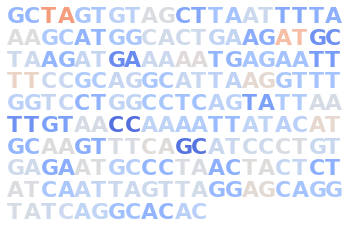

In [27]:
visualize_local_analysis(model_path='./test_local_seq_50/base_feature/corrected_max_test_0.8/350_10push0.7895.pth/',
        type='top-4_class_prototypes',
        img_ind=9)